In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [36]:
X, y = make_blobs(200, 2, centers=2, cluster_std=1.5, random_state=0)
X += 100

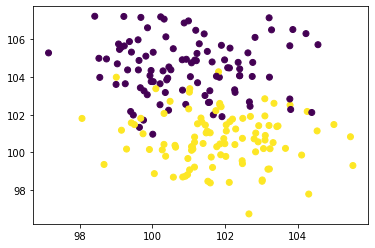

In [37]:
plt.scatter(X[:,0], X[:,1], c=y)

In [38]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

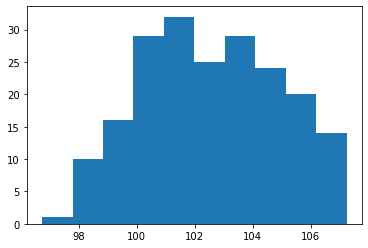

In [40]:
plt.hist(X[:,1])
plt.show()

In [41]:
pd.DataFrame(X).corr()

,0,1
0,1.000000,-0.266379
1,-0.266379,1.000000


In [42]:
model = GaussianNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame(confusion_matrix(y_test, model.predict(X_test) ))

0.86


,0,1
0,21,6
1,1,22


In [43]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame(confusion_matrix(y_test, model.predict(X_test) ))

0.86


,0,1
0,22,5
1,2,21


In [44]:
model = BernoulliNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame(confusion_matrix(y_test, model.predict(X_test) ))

0.46


,0,1
0,0,27
1,0,23


In [45]:
model = MultinomialNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame(confusion_matrix(y_test, model.predict(X_test) ))

0.66


,0,1
0,10,17
1,0,23


### Klasyfikacja tekstu spam/ham z wykorzystaniem NB

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
sentences = ["Julia kocha Marka", "Marek kocha Annę", "Anna i Julia kochają Marka"]

In [54]:
cvec = CountVectorizer()

In [55]:
# wektoryzacja tekstu / budowanie words-matrix
wm = cvec.fit_transform(sentences)
wm

<3x7 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [56]:
cvec.get_feature_names()

['anna', 'annę', 'julia', 'kocha', 'kochają', 'marek', 'marka']

In [57]:
pd.DataFrame( wm.toarray(), columns=cvec.get_feature_names() )

,anna,annę,julia,kocha,kochają,marek,marka
0,0,0,1,1,0,0,1
1,0,1,0,1,0,1,0
2,1,0,1,0,1,0,1


In [62]:
pd.set_option("max_colwidth", None)

df = pd.read_csv("http://51.91.120.89/extras/SMSSpamCollection.csv", sep="\t", header=None, names=["label","text"])
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [63]:
df.label.unique()

array(['ham', 'spam'], dtype=object)

In [65]:
df.label = df.label.map({ "ham":0, "spam":1 })
df.head(3)

,label,text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


In [66]:
# M...k - maska dla "Marek"
# [Mm]...k - maska dla "Marek" albo "marek"
# [0-9]{2}-[0-9]{3}
# ^[0-9]{2}-[0-9]{3}$ - dokładnie zaczyna się od i konczy się na
# [0-9]{1,2} - liczba maks. 2-cyfrowa
# [0-9]{3,} - liczba >= 100
# [0-9] - dozwolone znaki to od 0-9
# [^0-9] - dozwolone inne znaki niż 0-9
# [0-9A-Za-z_] to jest to samo do \w
# \s - spacje

In [69]:
df.text = df.text.str.replace("[^\w\s]", "")

<ipython-input-69-9a485894284a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.text = df.text.str.replace("[^\w\s]", "")


In [70]:
df.sample(n=10)

,label,text
5120,1,PRIVATE Your 2003 Account Statement for 078
278,0,Awesome Ill see you in a bit
3661,0,I will reach ur home in ltgt minutes
3008,0,Ah you see You have to be in the lingo I will let you know wot on earth it is when has finished making it
2267,1,Forwarded from 88877FREE entry into our 250 weekly comp just send the word ENTER to 88877 NOW 18 TC wwwtextcompcom
4321,0,Hey mr and I are going to the sea view and having a couple of gays I mean games Give me a bell when ya finish
692,0,Sorry to trouble u again Can buy 4d for my dad again 1405 1680 1843 All 2 big 1 small sat n sun Thanx
4848,0,I am in escape theatre now Going to watch KAVALAN in a few minutes
1370,0,Did you try making another butt
1366,1,HOT LIVE FANTASIES call now 08707509020 Just 20p per min NTT Ltd PO Box 1327 Croydon CR9 5WB 0870k


In [71]:
cvec = CountVectorizer()

In [72]:
cvec.fit(df.text) # budujemy leksykon
wm = cvec.transform(df.text)

In [73]:
wm.shape

(5572, 9546)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(wm.toarray(), df.label, test_size=0.1, random_state=0)

In [75]:
model = GaussianNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame(confusion_matrix(y_test, model.predict(X_test) ))

0.9019138755980861


,0,1
0,648,74
1,8,106


In [76]:
model = BernoulliNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame(confusion_matrix(y_test, model.predict(X_test) ))

0.9832535885167464


,0,1
0,722,0
1,14,100


In [77]:
model = MultinomialNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame(confusion_matrix(y_test, model.predict(X_test) ))

0.9808612440191388


,0,1
0,712,10
1,6,108


In [78]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame(confusion_matrix(y_test, model.predict(X_test) ))

0.9198564593301436


,0,1
0,722,0
1,67,47


In [80]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame(confusion_matrix(y_test, model.predict(X_test) ))

0.9856459330143541


,0,1
0,721,1
1,11,103


## Weryfikacja działania

In [97]:
X_train, X_test, y_train, y_test = train_test_split(wm.toarray(), df.label, test_size=0.1, random_state=0)

model = MultinomialNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame(confusion_matrix(y_test, model.predict(X_test) ))

0.9838709677419355


,0,1
0,477,4
1,5,72


In [98]:
txt = "extra promo buy now"
sample = cvec.transform([txt])
print(model.predict(sample))
print(model.predict_proba(sample))

[1]
[[0.46547635 0.53452365]]


In [99]:
txt = "please call me now"
sample = cvec.transform([txt])
print(model.predict(sample))
print(model.predict_proba(sample))

[0]
[[0.82916496 0.17083504]]
